All the Lifecycle In A Data Science Projects


  1. Data Analysis
  2. Feature Engineering
  3. Feature Selection
  4. Model Building
  5. Model Deployment

In [16]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/complete_data.csv')

Exploratory Analysis : 
 1. don't have any missing values
 2. one descrete feature education number
 3. encode wage values into binary format
 4. normalize the contious features
 5. Encode categorical features.

In [17]:
df = data.drop('Unnamed: 0',axis=1)

In [18]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


column Education and Education_num refer to the same thing so we can drom one of them
so let's drop eduction column


In [19]:
df.drop('education', axis= 1, inplace = True)

In [20]:
df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<25 ]
numerical_feature =  [feature for feature in df.columns if df[feature].dtype != 'O' and feature not in discrete_feature]
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']


## handling numerical values

In [22]:
df[numerical_feature]

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,39,77516,2174,0,40
1,50,83311,0,0,13
2,38,215646,0,0,40
3,53,234721,0,0,40
4,28,338409,0,0,40
...,...,...,...,...,...
48837,39,215419,0,0,36
48838,64,321403,0,0,40
48839,38,374983,0,0,50
48840,44,83891,5455,0,40


In [23]:
# apply normalization techniques
for column in numerical_feature:
    df[column] = df[column]  / df[column].abs().max()


In [24]:
df[numerical_feature].head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week
0,0.433333,0.052010,0.02174,0.0,0.404040
1,0.555556,0.055898,0.00000,0.0,0.131313
2,0.422222,0.144690,0.00000,0.0,0.404040
3,0.588889,0.157489,0.00000,0.0,0.404040
4,0.311111,0.227059,0.00000,0.0,0.404040


## handling categorical variables

In [25]:
df[categorical_features].head()

,workclass,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [26]:
# finding out the unique values in categorical variables
# printing total unique values in all the obejct columns / categorical columns
for column in categorical_features:
  unique = np.unique(df[column])
  print(f'{column} has {len(unique)} values there are {unique} \n')

workclass has 9 values there are [' Federal-gov' ' Local-gov' ' Never-worked' ' Private' ' Self-emp-inc'
 ' Self-emp-not-inc' ' State-gov' ' Without-pay' 'Non-defined'] 

marital_status has 7 values there are [' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed'] 

occupation has 15 values there are [' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving' 'Non-defined'] 

relationship has 6 values there are [' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife'] 

race has 5 values there are [' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White'] 

sex has 2 values there are [' Female' ' Male'] 

native_country has 42 values there are [' Cambodia' ' Canada' ' China' ' Columbia' ' Cuba'

There are few '?' unwanted category as well in our dataset let's handle first these category.


Let's handle all the categorical columns

In [27]:
df['wage_class'].replace({' <=50K.': ' <=50K',' >50K.':' >50K' }, inplace = True)

In [28]:
df_dummies = pd.get_dummies(df[categorical_features], drop_first=True)

In [29]:
# let's drop the cateorical variables
df.drop(categorical_features,axis=1, inplace = True)

In [30]:
# let's merge these two dataframes
data = pd.concat([df, df_dummies], axis = 1)

In [31]:
data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_Non-defined,wage_class_ >50K
0,0.433333,0.052010,13,0.02174,0.0,0.404040,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.555556,0.055898,13,0.00000,0.0,0.131313,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.422222,0.144690,9,0.00000,0.0,0.404040,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0.588889,0.157489,7,0.00000,0.0,0.404040,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.311111,0.227059,13,0.00000,0.0,0.404040,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.to_csv('feature_engineered_data.csv')

... update and new feature engineering need to take place

We have Age column which is numerical column but one way to transform age is to divide the values into classes and assign a unique value to it. for example
  0 - 10 year = 0 
  10 - 20 year = 1
  20 - 30 year = 2 ... so on

the problem is based upon the wages so one thing to be sure that the age would be start 18 or after this is the legal age to work so we can first try to get the min and max age from the age column

In [33]:
np.min(df.age), np.max(df.age) , np.mean(df.age), np.median(df.age)

(0.18888888888888888, 1.0, 0.42937317154179694, 0.4111111111111111)

we can try to divide our Age column into two parts mainly 17 to 37 and 37 to 90 
so in total there would be basially two class exist 

In [34]:
df.head() # all these are the numberical columns let's try to find out the Pearson’s correlation coefficient

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.433333,0.052010,13,0.02174,0.0,0.404040
1,0.555556,0.055898,13,0.00000,0.0,0.131313
2,0.422222,0.144690,9,0.00000,0.0,0.404040
3,0.588889,0.157489,7,0.00000,0.0,0.404040
4,0.311111,0.227059,13,0.00000,0.0,0.404040


In [36]:
df_numerical = data[numerical_feature + ['wage_class_ >50K']]

In [37]:
df_numerical.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,wage_class_ >50K
0,0.433333,0.052010,0.02174,0.0,0.404040,0
1,0.555556,0.055898,0.00000,0.0,0.131313,0
2,0.422222,0.144690,0.00000,0.0,0.404040,0
3,0.588889,0.157489,0.00000,0.0,0.404040,0
4,0.311111,0.227059,0.00000,0.0,0.404040,0


In [38]:
corr = df_numerical.corr()

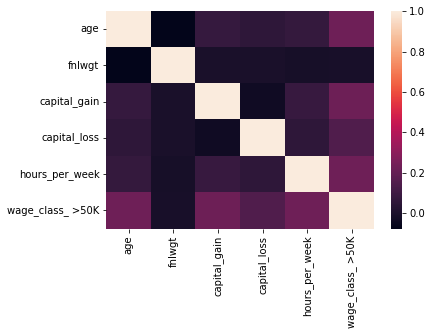

In [42]:
import seaborn as sns 
sns.heatmap(corr)

In [44]:
corr['wage_class_ >50K'].sort_values()

fnlwgt             -0.006339
capital_loss        0.147554
capital_gain        0.223013
hours_per_week      0.227687
age                 0.230369
wage_class_ >50K    1.000000
Name: wage_class_ >50K, dtype: float64

no direct correlation let's use ML